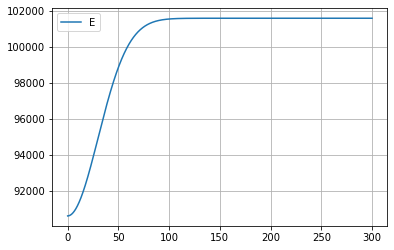

In [5]:
import wrftools as wrf
from matplotlib import pyplot as plt
import numpy as np

# run='run_land_t06'
vrmax=-0.05
rmax=30000

# flist=wrf.getflist(run)
# r=wrf.getRcoord(wrf.wopath(run,flist[0]))*1000
# dr=(r[1]-r[0])
# Pwrf0=wrf.getWRF(run, flist[0], 'P',type='az',z=0)*100

dr=100
r=np.arange(dr,300000,dr)

rkm=r/1000
Penv=101600
Pdef0=11000
Pexp0=Penv-Pdef0*np.exp(-(0.5*(r/rmax)**2))
# dPdr=np.gradient(Pexp0)/dr
# c=-0.5
# Ppow0=Penv-Pdef0*(r/rmax)**c
# plt.plot(r,Pwrf0)
plt.plot(rkm,Pexp0)
# plt.plot(r,Ppow0)
# plt.legend(('WRF','Exp','Pow'))
plt.legend('Exp')
plt.grid(True)

In [28]:
def dPdr2vr(dPdr,r):
    v=dPdr*-0.5 
    return(v)
    
def evolveP(P,r,dt):
    dPdr=np.gradient(P)/dr
    v=dPdr2vr(dPdr,r)
    dvdr=np.gradient(v)/dr
    
    dvdr[1]=dvdr[2]
    dvdr[0]=dvdr[1]
    v[1]=v[2]
    v[0]=v[1]
    r[1]=r[2]
    r[0]=r[1]
    
    adv=-v*dPdr
    div=-P*dvdr
    geo=-v*P/r
    dP=dt*(adv+div+geo)
#     plt.plot(r,dP)
    return(P+dP)

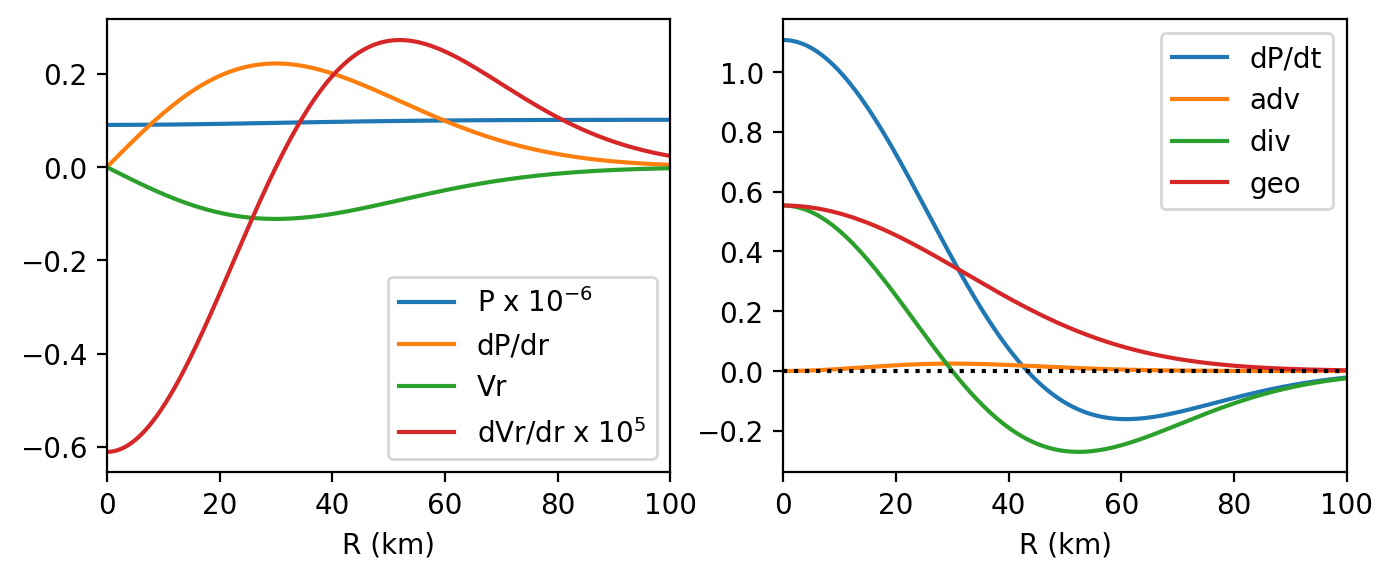

In [29]:
p=Pexp0
dpdr=np.gradient(p)/dr
v=dPdr2vr(dpdr,r)
dvdr=np.gradient(v)/dr

# build ramp up/ramp down column vr radprof
# rmaxx=np.argmin(np.abs(r-rmax))
# rampup=np.linspace(0,vrmax,num=rmaxx)
# rampdown=np.linspace(vrmax,0,num=len(r)-rmaxx+1)
# v=np.concatenate((rampup,rampdown[1:]))
dvdr[1]=dvdr[2]
dvdr[0]=dvdr[1]
v[1]=v[2]
v[0]=v[1]
r[1]=r[2]
r[0]=r[1]

adv=-v*dpdr
div=-p*dvdr
geo=-p*v/r
dpdt=adv+div+geo

fig,axs=plt.subplots(1,2,dpi=200,figsize=(8,3))
ax=axs[0]
xr=(0,100)
ax.plot(rkm,p/1000000)
ax.plot(rkm,dpdr)
ax.plot(rkm,v)
ax.plot(rkm,dvdr*100000)
ax.legend(('P x 10$^{-6}$','dP/dr','Vr','dVr/dr x 10$^5$'))
ax.set_xlabel('R (km)')
ax.set_xlim(xr)

ax=axs[1]
ax.plot(rkm,dpdt)
ax.plot(rkm,adv)
ax.plot(rkm,div)
ax.plot(rkm,geo)
ax.legend(('dP/dt','adv','div','geo'))
ax.set_xlabel('R (km)');
ax.axhline(color='k',linestyle=':');
ax.set_xlim(xr);

In [56]:
dt=60
Pl=[p]
for n in range(0,(10)):
    print(n)
    Pl.append(evolveP(Pl[-1],r,dt))

0
1
2
3
4
5
6
7
8
9


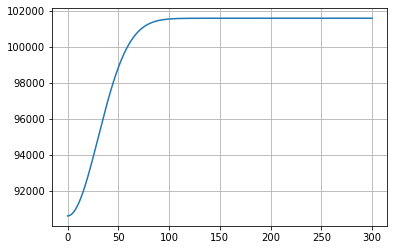

In [57]:
fig,axs=plt.subplots(1,1)
ax=axs
for P in Pl[::60]:
    ax.plot(rkm,P)
ax.grid(True)